# Code Snippets for plotting well logs in python

Remember that you will need to set up a conda or python environment for installing all the packages before loading and using them into these workflows.

## Part I - Snippets for reading in and preparing data 

In [2]:
# Importing packages
import os # to manage directories
import numpy as np # arrays
import pandas as pd # dataframes and data import
import matplotlib.pyplot as plt # to plot static 
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
import matplotlib.patches as patches


In [3]:
# Setting working directory to where you will have the data file stored
#os.chdir('/home/you/Spring_2025/Homework3/')


In [4]:
# Reading Excel with logs and header from current directory
df = pd.read_excel('HW2_data.xlsx',skiprows=37,header=None)
# New values for the first row to remove ~A (manually) character and change NPHI name
new_values='DEPTH        SP           RWA          RSFL         RILM         RILD         DT           GR           CALI         DPHI         NPHI_SS RHOB         '
# Change the contents of the first row
df.iloc[0] = new_values
#print(df.iloc[0])
#df.iloc[0]
df.columns 

Index([0], dtype='int64')

We currently only have one column with all logs within it as strings, so we need to separate them into columns based on the space characters presence and then convert them to numerical values

In [5]:
# Separating the one column into their corresponding
df2 = df[0].str.split(expand=True)

# Setting the first row as the header
df2.columns = df2.iloc[0]  # Set the first row as the header

# Removing the first row from the data and Reset the index
df2 = df2[1:].reset_index(drop=True) # reseting index for the data rows

# Now, we need to convert all values to numerical, as they are currently objects (Text/Strings)
df2 = df2.apply(pd.to_numeric, errors='coerce') #coerces the conversion of nonnumerical values to NaN
df2.head() # reading the first values of the dataframe to check

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB
0,5300.00,-0.251479,0.207594,0.944588,0.902729,0.902729,122.6844,84.419291,1.421834,30.295712,0.488664,2.150121
1,5300.25,-0.251479,0.213018,0.944588,0.910987,0.902729,122.6844,84.271654,1.421834,30.325283,0.490882,2.149633
2,5300.50,-0.251479,0.218442,0.944588,0.919246,0.902729,122.9794,84.124016,1.421834,30.354855,0.493100,2.149145
3,5300.75,-0.247546,0.221048,0.943543,0.918322,0.901765,123.4710,83.682239,1.420858,30.354855,0.492731,2.149145
4,5301.00,-0.243612,0.223654,0.942498,0.917398,0.900802,123.7752,83.240463,1.419882,30.354855,0.492363,2.149145


Then we check the data ranges with the describe function, finding values such as -999.25 which should be considered as NaN as well. We also see that the caliper is in feet, and so we convert it here below to inches.

In [6]:
# We need to convert the Caliper curve in feet to inches
df2['CALI_inches'] = df2['CALI'] * 12

More statistics to see the results!

In [7]:
df2.describe() # This gives descriptive statistics about each log

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB,CALI_inches
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,5550.000000,-37.672547,-19.643445,-13.612297,-16.930731,-16.380972,120.320567,61.436814,1.277422,32.444860,0.374356,2.114660,15.329059
std,144.445816,138.691963,139.943444,142.116191,140.468829,140.636946,13.097931,19.159930,0.119303,7.528386,0.115705,0.124218,1.431640
min,5300.000000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,87.581100,25.388825,1.138569,20.744209,0.040956,1.716295,13.662829
25%,5425.000000,-34.491995,0.136943,0.890537,0.874538,0.862842,112.654900,42.013771,1.159367,27.957328,0.335190,2.087178,13.912402
50%,5550.000000,-13.084106,0.198032,0.957521,0.966240,0.957521,120.127800,64.622506,1.273293,30.975850,0.383767,2.138898,15.279519
75%,5675.000000,-0.695243,0.360915,1.956551,1.847553,1.908125,124.921500,79.145262,1.404587,34.110399,0.466190,2.188704,16.855045
max,5800.000000,3.047880,1.006410,191.570754,64.548813,58.232091,160.245800,94.064097,1.491612,56.588212,0.536865,2.307721,17.899346


Above, we can observe that the minimum values for many logs are -999.25, which is typically coded for not-logged in well logging companies. Thus, Data QC'ing further:

In [8]:
# We then replace them with NaN and check for the statistics again
df2.replace(-999.250000, np.nan, inplace=True) # Cleaning dataset by replacing -999.250000 with nan (not a number)
df2.describe() #check results with statistics

,DEPTH,SP,RWA,RSFL,RILM,RILD,DT,GR,CALI,DPHI,NPHI_SS,RHOB,CALI_inches
count,2001.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000
mean,5550.000000,-18.058525,0.338331,6.492501,3.106378,3.667351,120.320567,61.436814,1.277422,32.444860,0.374356,2.114660,15.329059
std,144.445816,19.315551,0.322297,19.458414,6.293189,8.082643,13.097931,19.159930,0.119303,7.528386,0.115705,0.124218,1.431640
min,5300.000000,-60.157748,0.040946,0.408385,0.374686,0.334551,87.581100,25.388825,1.138569,20.744209,0.040956,1.716295,13.662829
25%,5425.000000,-33.024167,0.141511,0.894549,0.878510,0.872559,112.654900,42.013771,1.159367,27.957328,0.335190,2.087178,13.912402
50%,5550.000000,-10.921774,0.199564,0.961824,0.970630,0.957566,120.127800,64.622506,1.273293,30.975850,0.383767,2.138898,15.279519
75%,5675.000000,-0.671788,0.383214,2.032065,1.950757,1.977465,124.921500,79.145262,1.404587,34.110399,0.466190,2.188704,16.855045
max,5800.000000,3.047880,1.006410,191.570754,64.548813,58.232091,160.245800,94.064097,1.491612,56.588212,0.536865,2.307721,17.899346


We can see that the statistics make sense in regards of values for each well log

## Part II - Tutorial for plotting

We encourage you to play with this code, and understand how to plot with this method, using subplots, and what each parameter does.

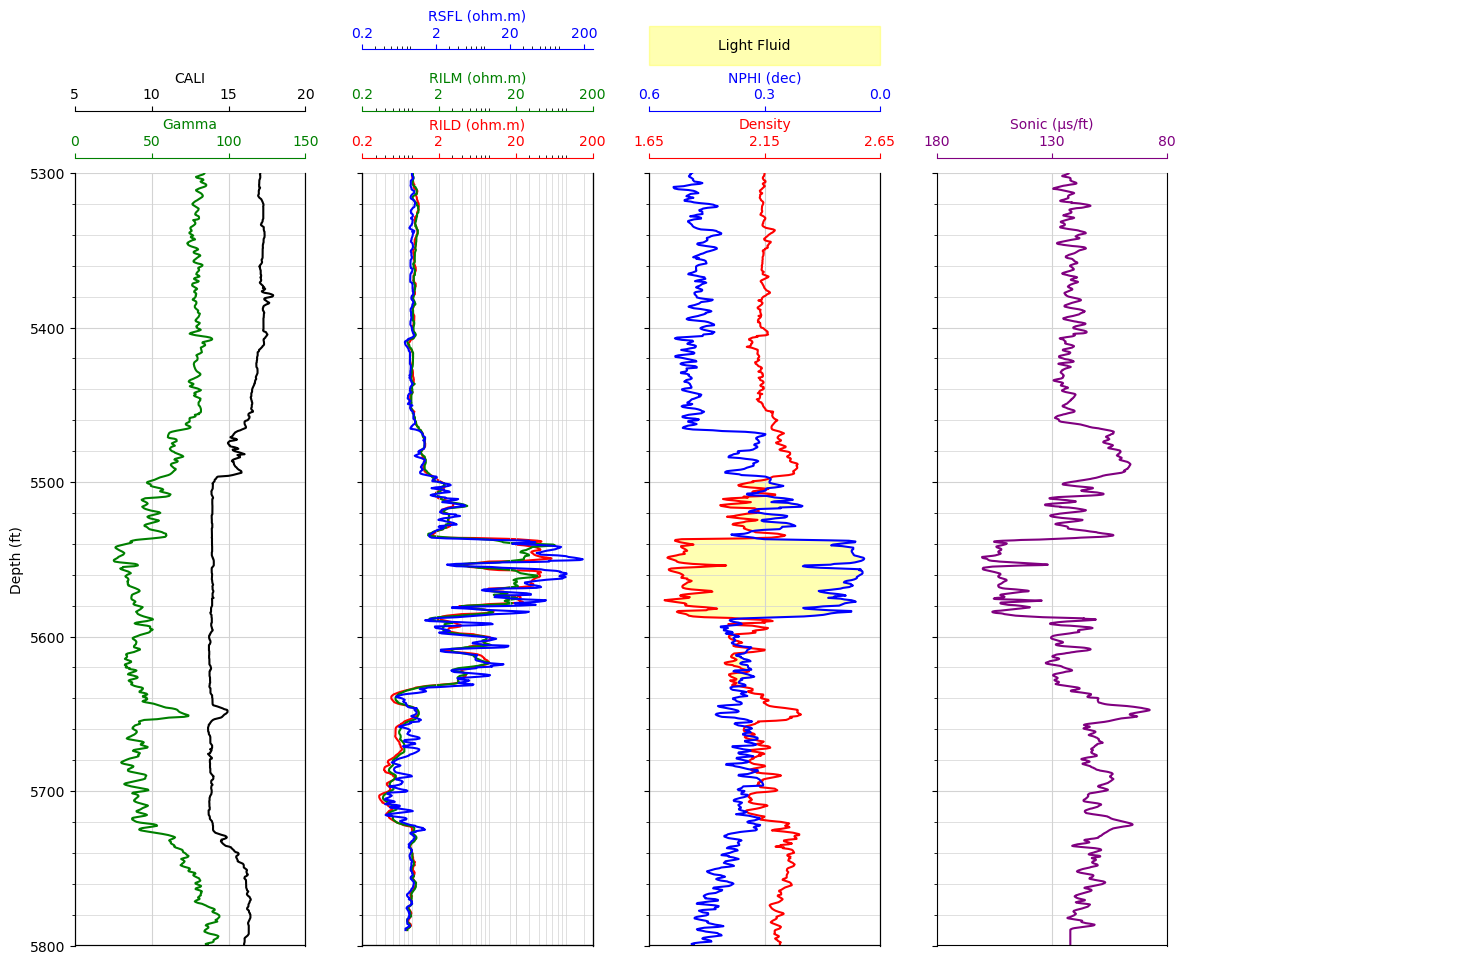

In [9]:

# This assumes that df2 has the data from the logs
fig, ax = plt.subplots(figsize=(15, 10), sharey=True)
fig.patch.set_visible(False)
plt.axis('off')

# Set up the plot axes
ax1 = plt.subplot2grid((1, 5), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 5), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 5), (0, 2), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((1, 5), (0, 3), rowspan=1, colspan=1)
ax5 = ax3.twiny()  # Twins the y-axis for the density track with the neutron track

# Set common y-limits (Depth limits) for all subplots
common_ylim = (5300, 5800) 

# Gamma Ray track
ax1.plot("GR", "DEPTH", data=df2, color="green")
ax1.set_xlabel("Gamma") # Alias or name for the header of the track
ax1.xaxis.label.set_color("green") # color for the label
ax1.set_xlim(0, 150) # limit for GR axes
ax1.set_ylabel("Depth (ft)") # This is the only track that will show this
ax1.tick_params(axis='x', colors="green") # thick lines
ax1.spines["top"].set_edgecolor("green") 
ax1.title.set_color('green') # color for curve title
ax1.set_xticks([0, 50, 100, 150]) # tick lines for GR axes
ax1.set_ylim(common_ylim)

# Twin ax1 for plotting CALIPER_inches simultaneously as GR
ax1_twiny = ax1.twiny()
ax1_twiny.plot("CALI_inches", "DEPTH", data=df2, color="black", label="CALI")
ax1_twiny.set_xlabel("CALI")
ax1_twiny.xaxis.label.set_color("black")
ax1_twiny.set_xlim(5, 20)  # Limit CALI to 5-20
ax1_twiny.tick_params(axis='x', colors="black")
ax1_twiny.spines["top"].set_position(("axes", 1.08))
ax1_twiny.spines["top"].set_edgecolor("black")


# Resistivity track
# Deep resistivity
ax2.plot("RILD", "DEPTH", data=df2, color="red")  # Deep resistivity
ax2.set_xlabel("RILD (ohm.m)")
ax2.set_xlim(0.2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.semilogx()
ax2.set_ylim(common_ylim)
ax2.grid(which='both', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# create a twin axis for shallow resistivity
ax2_twiny1 = ax2.twiny()
ax2_twiny1.plot("RILM", "DEPTH", data=df2, color="green")  # Medium resistivity
ax2_twiny1.set_xlabel("RILM (ohm.m)")
ax2_twiny1.xaxis.label.set_color("green")
ax2_twiny1.tick_params(axis='x', colors="green")
ax2_twiny1.spines["top"].set_position(("axes", 1.08))
ax2_twiny1.spines["top"].set_edgecolor("green")
ax2_twiny1.semilogx()
ax2_twiny1.set_ylim(common_ylim)

# create a twin axis for spherically-focused resistivity
ax2_twiny2 = ax2.twiny()
ax2_twiny2.plot("RSFL", "DEPTH", data=df2, color="blue")  # Spherical resistivity
ax2_twiny2.set_xlabel("RSFL (ohm.m)")
ax2_twiny2.xaxis.label.set_color("blue")
ax2_twiny2.tick_params(axis='x', colors="blue")
ax2_twiny2.spines["top"].set_position(("axes", 1.16))
ax2_twiny2.spines["top"].set_edgecolor("blue")
ax2_twiny2.semilogx()
ax2_twiny2.set_ylim(common_ylim)

# Density track
ax3.plot("RHOB", "DEPTH", data=df2, color="red")
ax3.set_xlabel("Density")
ax3.set_xlim(1.65, 2.65)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([1.65, 2.15, 2.65])
ax3.set_ylim(common_ylim)


# Sonic track
ax4.plot("DT", "DEPTH", data=df2, color="purple")
ax4.set_xlabel("Sonic (µs/ft)")
ax4.set_xlim(180, 80)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")
ax4.set_ylim(common_ylim)
ax4.set_xticks([180,130,80])
ax4.set_xticklabels([180,130,80])  # Ensure labels match the ticks

# Neutron track placed on top of density track
ax5.plot("NPHI_SS", "DEPTH", data=df2, color="blue")
ax5.set_xlabel('NPHI (dec)')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(0.6, 0)
ax5.set_ylim(common_ylim)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([0.6, 0.3, 0])

# Steps needed to shade
# Transform NPHI_SS data from ax5 to ax3's coordinate system
nphi_display = ax5.transData.transform(np.c_[df2["NPHI_SS"], df2["DEPTH"]])
nphi_data = ax3.transData.inverted().transform(nphi_display)

# Shading between RHOB and transformed NPHI_SS
ax3.fill_betweenx(df2["DEPTH"], df2["RHOB"], nphi_data[:, 0], where=(df2["RHOB"] < nphi_data[:, 0]), color='yellow', alpha=0.3)


# Add a rectangle with text above the NPHI label
rect = patches.Rectangle((0, 1.14), 1, 0.05, transform=ax5.transAxes, color='yellow', alpha=0.3, clip_on=False)
ax5.add_patch(rect)
ax5.text(0.3, 1.165, 'Light Fluid', transform=ax5.transAxes, fontsize=10, verticalalignment='center', color='black')


# Remove y-axis tick labels for all axes except ax1
for ax in [ax2, ax3, ax4]:
    ax.set_yticklabels([])

# Common functions for setting up the plot
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))


# List of all resistivity-related axes
resistivity_axes = [ax2, ax2_twiny1, ax2_twiny2]

# Set specific x-ticks and add gridlines for all resistivity-related axes
resistivity_ticks = [0.2, 2, 20, 200]
for ax in resistivity_axes:
    ax.set_xticks(resistivity_ticks)
    ax.set_xticklabels(resistivity_ticks)  # Ensure labels match the ticks
    ax.grid(which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)

# List of all axes including twinned axes
all_axes = [ax1, ax2, ax3, ax4,   ax2_twiny1, ax2_twiny2]


# Invert the y-axis for all axes
for ax in all_axes:
    ax.yaxis.set_minor_locator(MultipleLocator(20)) # y axes gridlines location
    ax.grid(which='minor', axis='y', color='lightgrey', linestyle='-', linewidth=0.5)
    ax.tick_params(axis='y', which='minor', labelleft=False)  # Hide minor tick labels 
    ax.invert_yaxis()



# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()